In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats  # For mode calculation


In [2]:
df = pd.read_csv(r"C:\Users\raulo\Desktop\ze_vids\tracks_and_labels\Top+Front\Joinned\joinned_label+track_top+front.csv")

In [3]:
df["Behavior"].value_counts()

Background     419838
interaction     73498
posing            949
jolts             153
TS                 16
Name: Behavior, dtype: int64

In [5]:
# Create a new DataFrame to store the results
new_df = pd.DataFrame()

# Add relevant data to the new DataFrame
new_df["Behavior"] = df['Behavior']

new_df['Client_Mouth_X_top'] = df['Client_Mouth']
new_df['Client_Mouth_Y_top'] = df['Client_Mouth.1']
new_df['Client_Mouth_Z_front']= df['Client_Mouth_Front.1']

new_df['Client_S1_X_top'] = df['Client_Spine_1']
new_df['Client_S1_Y_top'] = df['Client_Spine_1.1']
new_df['Client_S1_Z_front']= df['Client_Spine_head_Front.1']

new_df['Client_S2_X_top'] = df['Client_Spine_2']
new_df['Client_S2_Y_top'] = df['Client_Spine_2.1']
new_df['Client_S2_Z_front']= df['Client_Spine_mid_Front.1']

new_df['Client_Tail_X_top'] = df['Client_Tail']
new_df['Client_Tail_Y_top'] = df['Client_Tail.1']
new_df['Client_Tail_Z_front']= df['Client_Tail_Front.1']

new_df['Cleaner_Mouth_X_top'] = df['Cleaner_Mouth']
new_df['Cleaner_Mouth_Y_top'] = df['Cleaner_Mouth.1']
new_df['Cleaner_Mouth_Z_front']= df['Cleaner_Mouth_Front.1']

new_df['Cleaner_Spine1_X_top'] = df['Cleaner_Spine1']
new_df['Cleaner_Spine1_Y_top'] = df['Cleaner_Spine1.1']
new_df['Cleaner_Spine1_Z_front']= df['Cleaner_Spine1_Front.1']

new_df['Cleaner_Spine2_X_top'] = df['Cleaner_Spine2']
new_df['Cleaner_Spine2_Y_top'] = df['Cleaner_Spine2.1']
new_df['Cleaner_Spine2_Z_front']= df['Cleaner_Spine2_Front.1']

new_df['Cleaner_Tail_X_top'] = df['Cleaner_Tail']
new_df['Cleaner_Tail_Y_top'] = df['Cleaner_Tail.1']
new_df['Cleaner_Tail_Z_front']= df['Cleaner_Tail_Front.1']

In [30]:
new_df["Frame"] = df['Frame']

In [9]:
# Create a new column in new_df to store the centroid for each row
new_df['Client_Centroid_X'] = new_df[['Client_Mouth_X_top', 'Client_S1_X_top', 'Client_S2_X_top', 'Client_Tail_X_top']].mean(axis=1)
new_df['Client_Centroid_Y'] = new_df[['Client_Mouth_Y_top', 'Client_S1_Y_top', 'Client_S2_Y_top', 'Client_Tail_Y_top']].mean(axis=1)
new_df['Client_Centroid_Z'] = new_df[['Client_Mouth_Z_front', 'Client_S1_Z_front', 'Client_S2_Z_front', 'Client_Tail_Z_front']].mean(axis=1)

In [10]:
# Create a new column in new_df to store the centroid for each row
new_df['Cleaner_Centroid_X'] = new_df[['Cleaner_Mouth_X_top', 'Cleaner_Spine1_X_top', 'Cleaner_Spine2_X_top', 'Cleaner_Tail_X_top']].mean(axis=1)
new_df['Cleaner_Centroid_Y'] = new_df[['Cleaner_Mouth_Y_top', 'Cleaner_Spine1_Y_top', 'Cleaner_Spine2_Y_top', 'Cleaner_Tail_Y_top']].mean(axis=1)
new_df['Cleaner_Centroid_Z'] = new_df[['Cleaner_Mouth_Z_front', 'Cleaner_Spine1_Z_front', 'Cleaner_Spine2_Z_front', 'Cleaner_Tail_Z_front']].mean(axis=1)

In [12]:
# Calculate the Euclidean distance between the two centroids for each row
new_df['Distance'] = np.sqrt(
    (new_df['Client_Centroid_X'] - new_df['Cleaner_Centroid_X'])**2 +
    (new_df['Client_Centroid_Y'] - new_df['Cleaner_Centroid_Y'])**2 +
    (new_df['Client_Centroid_Z'] - new_df['Cleaner_Centroid_Z'])**2
)

In [13]:
new_df

,Behavior,Client_Mouth_X_top,Client_Mouth_Y_top,Client_Mouth_Z_front,Client_S1_X_top,Client_S1_Y_top,Client_S1_Z_front,Client_S2_X_top,Client_S2_Y_top,Client_S2_Z_front,...,Cleaner_Tail_X_top,Cleaner_Tail_Y_top,Cleaner_Tail_Z_front,Client_Centroid_X,Client_Centroid_Y,Client_Centroid_Z,Cleaner_Centroid_X,Cleaner_Centroid_Y,Cleaner_Centroid_Z,Distance
0,Background,1308.093,419.526,892.211,1346.876,426.760,886.200,1403.251,427.585,916.081,...,1282.976,924.739,764.164,1372.62300,420.90175,908.40425,1241.82950,915.11000,774.03575,528.586443
1,Background,1301.067,414.470,892.209,1340.332,426.760,874.595,1388.009,420.569,867.733,...,1275.454,924.739,764.213,1361.65450,417.70825,893.41550,1232.96375,912.63100,774.32400,525.064399
2,Background,1269.530,414.470,893.869,1298.572,426.760,875.479,1364.604,420.569,859.737,...,1275.454,930.310,770.402,1331.62850,417.70825,892.05250,1222.79100,915.67100,777.93775,522.335790
3,Background,1264.340,406.180,898.790,1298.261,426.760,875.766,1348.578,428.476,868.607,...,1259.884,930.310,771.239,1323.00275,418.13475,895.59625,1210.65650,915.71550,779.56200,523.136913
4,Background,1259.199,406.180,898.790,1292.935,426.186,875.766,1340.558,428.476,868.607,...,1243.329,924.739,773.472,1318.38100,420.44175,895.59625,1189.16800,916.90925,780.31950,525.799113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494449,Background,298.287,742.995,812.957,260.575,796.450,796.664,225.504,827.783,788.465,...,806.698,321.148,236.557,245.62700,798.31925,796.56775,832.83700,256.28975,266.78150,958.793530
494450,Background,295.017,738.109,813.515,260.144,796.450,800.570,226.543,827.935,788.513,...,817.811,311.338,251.281,244.94250,797.13625,797.71325,838.83125,244.95700,272.80350,965.989657
494451,Background,293.875,735.024,818.079,260.144,796.215,802.501,227.233,827.935,789.440,...,820.818,306.764,268.449,245.58275,796.33775,801.22075,840.66450,239.70475,276.40400,969.224023
494452,Background,289.687,733.892,816.668,260.144,795.015,802.372,227.266,827.935,787.931,...,832.998,300.703,268.449,244.51625,795.81475,800.45850,845.04000,232.80100,273.84250,977.209122


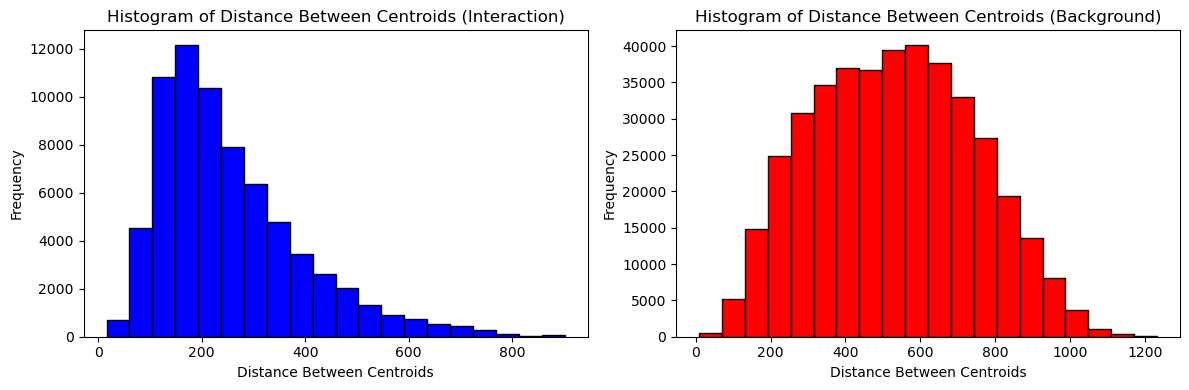

In [15]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first histogram (interaction)
ax1.hist(new_df[new_df['Behavior'] == 'interaction']['Distance'], bins=20, edgecolor='black', color='blue')
ax1.set_xlabel('Distance Between Centroids')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Distance Between Centroids (Interaction)')

# Plot the second histogram (non-interaction)
ax2.hist(new_df[new_df['Behavior'] == 'Background']['Distance'], bins=20, edgecolor='black', color='red')
ax2.set_xlabel('Distance Between Centroids')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Distance Between Centroids (Background)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
plt.show()

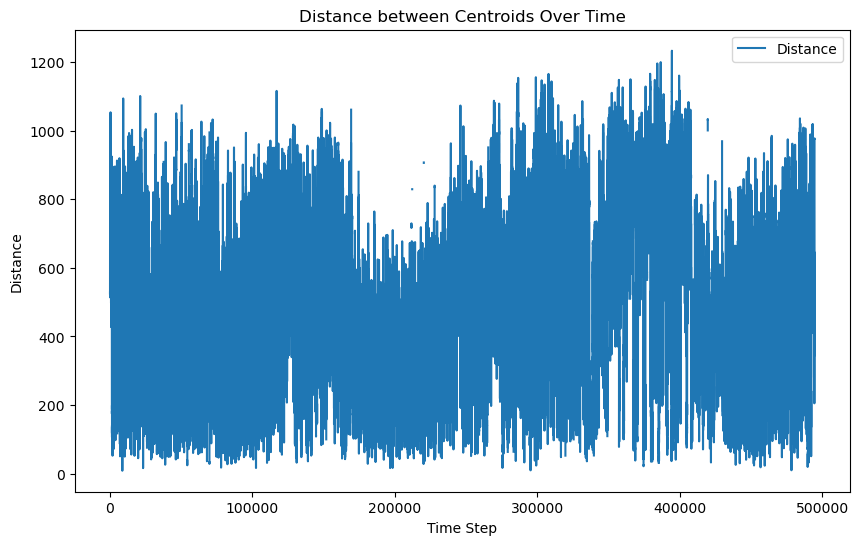

In [18]:
# Assuming you have a pandas DataFrame 'df' with a 'Distance' column
plt.figure(figsize=(10, 6))
plt.plot(new_df['Distance'], label='Distance')
plt.xlabel('Time Step')
plt.ylabel('Distance')
plt.legend()
plt.title('Distance between Centroids Over Time')
plt.show()

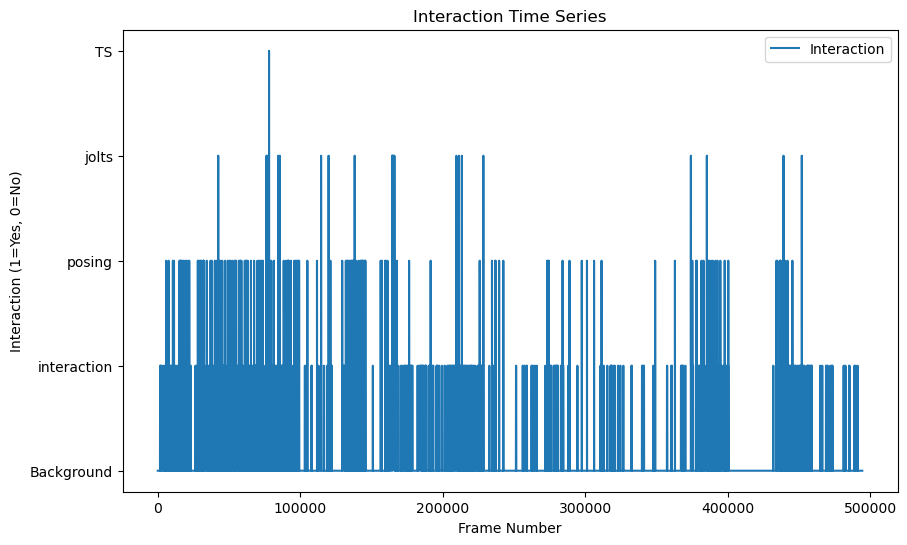

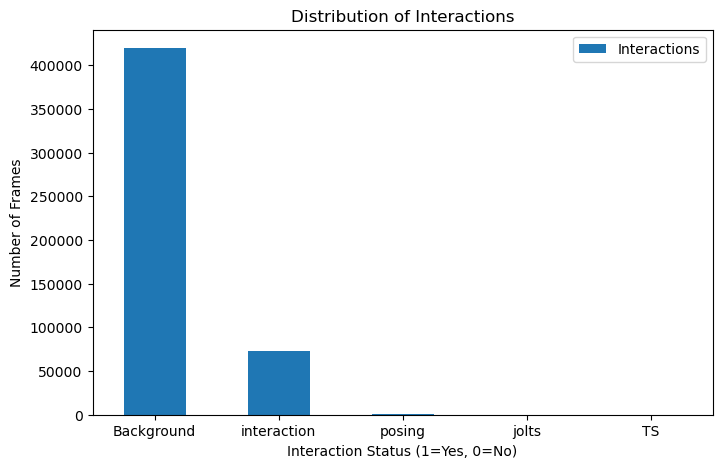

In [21]:
# Create a line plot showing the time series of interactions
plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Behavior'], label='Interaction')
plt.xlabel('Frame Number')
plt.ylabel('Interaction (1=Yes, 0=No)')
plt.legend()
plt.title('Interaction Time Series')
plt.show()

# Create a bar plot to show the distribution of interactions
interaction_counts = new_df['Behavior'].value_counts()
plt.figure(figsize=(8, 5))
interaction_counts.plot(kind='bar', label='Interactions')
plt.xlabel('Interaction Status (1=Yes, 0=No)')
plt.ylabel('Number of Frames')
plt.legend()
plt.title('Distribution of Interactions')
plt.xticks(rotation=0)
plt.show()

In [46]:
new_df

,Behavior,Client_Mouth_X_top,Client_Mouth_Y_top,Client_Mouth_Z_front,Client_S1_X_top,Client_S1_Y_top,Client_S1_Z_front,Client_S2_X_top,Client_S2_Y_top,Client_S2_Z_front,...,Client_Centroid_Y,Client_Centroid_Z,Cleaner_Centroid_X,Cleaner_Centroid_Y,Cleaner_Centroid_Z,Distance,Behavior_numeric,Frame,Lag_Distance,Rolling_Mean_Distance
0,Background,1308.093,419.526,892.211,1346.876,426.760,886.200,1403.251,427.585,916.081,...,420.90175,908.40425,1241.82950,915.11000,774.03575,528.586443,1.0,25251.0,NaN,NaN
1,Background,1301.067,414.470,892.209,1340.332,426.760,874.595,1388.009,420.569,867.733,...,417.70825,893.41550,1232.96375,912.63100,774.32400,525.064399,1.0,25252.0,528.586443,NaN
2,Background,1269.530,414.470,893.869,1298.572,426.760,875.479,1364.604,420.569,859.737,...,417.70825,892.05250,1222.79100,915.67100,777.93775,522.335790,1.0,25255.0,525.064399,NaN
3,Background,1264.340,406.180,898.790,1298.261,426.760,875.766,1348.578,428.476,868.607,...,418.13475,895.59625,1210.65650,915.71550,779.56200,523.136913,1.0,25256.0,522.335790,NaN
4,Background,1259.199,406.180,898.790,1292.935,426.186,875.766,1340.558,428.476,868.607,...,420.44175,895.59625,1189.16800,916.90925,780.31950,525.799113,1.0,25257.0,523.136913,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494449,Background,298.287,742.995,812.957,260.575,796.450,796.664,225.504,827.783,788.465,...,798.31925,796.56775,832.83700,256.28975,266.78150,958.793530,1.0,168761.0,952.489737,952.155893
494450,Background,295.017,738.109,813.515,260.144,796.450,800.570,226.543,827.935,788.513,...,797.13625,797.71325,838.83125,244.95700,272.80350,965.989657,1.0,168762.0,958.793530,953.747061
494451,Background,293.875,735.024,818.079,260.144,796.215,802.501,227.233,827.935,789.440,...,796.33775,801.22075,840.66450,239.70475,276.40400,969.224023,1.0,168765.0,965.989657,955.431863
494452,Background,289.687,733.892,816.668,260.144,795.015,802.372,227.266,827.935,787.931,...,795.81475,800.45850,845.04000,232.80100,273.84250,977.209122,1.0,168766.0,969.224023,958.065287


In [129]:
def detect_interactions(distances, min_consecutive=60, threshold=250):
    """
    Detect interactions in a sequence of distances.

    Parameters:
        distances (list or numpy array): A sequence of distances.
        min_consecutive (int): Minimum consecutive frames required for an interaction.
        threshold (float): Threshold value to determine an interaction.

    Returns:
        List of tuples where each tuple represents an interaction (start_frame, end_frame).
    """
    interactions = []
    current_start = None

    for i, distance in enumerate(distances):
        if distance < threshold:
            if current_start is None:
                current_start = i
        else:
            if current_start is not None:
                if i - current_start >= min_consecutive:
                    interactions.append((current_start, i - 1))
                current_start = None

    # Check if an interaction is ongoing at the end of the sequence
    if current_start is not None and len(distances) - current_start >= min_consecutive:
        interactions.append((current_start, len(distances) - 1))

    return interactions

In [130]:
total_frames = 0
correctly_detected = 0
total = 0
correctly_frame_count = 0

interactions = detect_interactions(new_df["Distance"])

for interaction in interactions:
    
    start_frame, end_frame = interaction
    
    if end_frame - start_frame + 1 >= 15:
        total += 1  # Increment the total count for eligible interactions
        total_frames += end_frame - start_frame + 1
        selected_data = new_df.loc[start_frame:end_frame, "Behavior"]
        mode_value = stats.mode(selected_data).mode[0]
        
        if mode_value == "interaction":
            correctly_detected +=1
            correctly_frame_count += end_frame - start_frame + 1
        print(f"Interaction detected from frame {start_frame} to {end_frame} (Duration: {end_frame - start_frame + 1} frames) with a true Behavior of {mode_value}")

Interaction detected from frame 1583 to 1807 (Duration: 225 frames) with a true Behavior of interaction
Interaction detected from frame 1999 to 2143 (Duration: 145 frames) with a true Behavior of interaction
Interaction detected from frame 2473 to 2700 (Duration: 228 frames) with a true Behavior of interaction
Interaction detected from frame 2818 to 2883 (Duration: 66 frames) with a true Behavior of interaction
Interaction detected from frame 5322 to 5435 (Duration: 114 frames) with a true Behavior of interaction
Interaction detected from frame 6878 to 6937 (Duration: 60 frames) with a true Behavior of interaction
Interaction detected from frame 6991 to 7093 (Duration: 103 frames) with a true Behavior of interaction
Interaction detected from frame 7994 to 8076 (Duration: 83 frames) with a true Behavior of interaction
Interaction detected from frame 8702 to 8799 (Duration: 98 frames) with a true Behavior of interaction
Interaction detected from frame 10298 to 10359 (Duration: 62 frames)

C:\Users\raulo\AppData\Local\Temp\ipykernel_18152\3624124583.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(selected_data).mode[0]
C:\Users\raulo\AppData\Local\Temp\ipykernel_18152\3624124583.py:16: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode_value = stats.mode(selected_data).mode[0]


In [131]:
correctly_frame_count

28755

In [132]:
correctly_detected/total

0.6430517711171662

In [133]:
total_frames

40635